In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("../data/n_projs/experiment_results.csv")
projection_count = "# Projections"

metrics = ['Dice 3D [%]', 'IoU 3D [%]', 'Chamfer distance 3D [mm]']
df

,Unnamed: 0,Vessel,Tortosity,# Projections,Time [s],Dice 3D [%],IoU 3D [%],Chamfer distance 3D [mm]
0,0,moderate0,moderate,1,1.448132,12.186226,6.488462,11.167915
1,1,moderate0,moderate,1,1.344031,12.925643,6.909361,9.595596
2,2,moderate0,moderate,2,1.312360,61.118012,44.007156,1.524482
3,3,moderate0,moderate,2,1.572198,47.111111,30.813953,2.998816
4,4,moderate0,moderate,3,1.489531,61.481481,44.385027,1.802958
5,5,moderate0,moderate,3,1.261113,71.041369,55.088496,1.430840
6,6,moderate0,moderate,4,1.424396,49.663138,33.034571,2.550800
7,7,moderate0,moderate,4,1.509323,81.583477,68.895349,0.583908
8,8,moderate0,moderate,5,1.306271,78.114478,64.088398,0.736319
9,9,moderate0,moderate,5,1.599650,80.000000,66.666667,0.648523


In [9]:
df_grouped = df.groupby(projection_count)[metrics].agg(['mean', 'var']).reset_index()
df_grouped

# Projections Dice 3D [%]             IoU 3D [%]              \
                        mean         var       mean         var   
0              1   12.555934    0.273369   6.698912    0.088578   
1              2   54.114562   98.096642  37.410555   87.030291   
2              3   66.261425   45.695729  49.736761   57.282123   
3              4   65.623307  509.454025  50.964960  642.997691   
4              5   79.057239    1.777596  65.377532    3.323735   
5              6   81.621232    0.003576  68.949237    0.007284   
6              7   82.615816    1.121014  70.387635    2.361936   
7              8   81.746543    0.140516  69.129098    0.287431   
8              9   82.285714    0.000000  69.902913    0.000000   
9             10   81.122831    0.026487  68.241042    0.053051   
10            11   81.049073    0.508688  68.139585    1.016380   
11            12   81.192247    1.280288  68.346817    2.570562   
12            13   79.486322    0.378343  65.958427    0.717482   
13            14   80.153008    0.997910  66.885246    1.934964   
14            15   80.470592    0.048442  67.323123    0.094926   

   Chamfer distance 3D [mm]            
                       mean       var  
0                 10.381755  1.236094  
1                  2.261649  1.086831  
2                  1.616899  0.069236  
3                  1.567354  1.934331  
4                  0.692421  0.003854  
5                  0.509898  0.000030  
6                  0.500481  0.002433  
7                  0.500789  0.001422  
8                  0.481438  0.000002  
9                  0.500574  0.000013  
10                 0.499857  0.000487  
11                 0.495852  0.000378  
12                 0.532001  0.000208  
13                 0.515699  0.000403  
14                 0.508065  0.000004

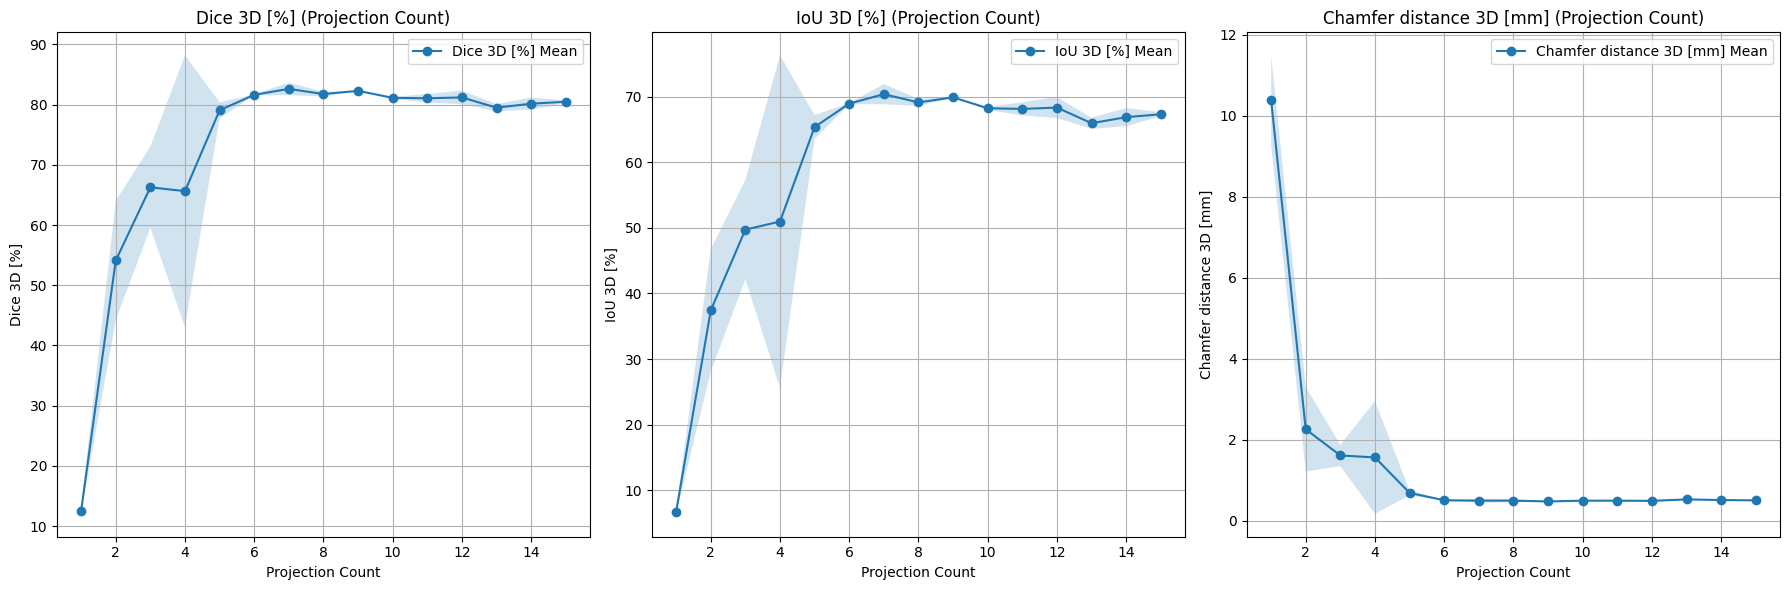

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics[:3]):
    mean_values = df_grouped[(metric, 'mean')]
    var_values = df_grouped[(metric, 'var')]
    axes[i].plot(df_grouped[projection_count], mean_values, label=f'{metric} Mean', marker='o')
    axes[i].fill_between(df_grouped[projection_count], 
                          mean_values - var_values**0.5, 
                          mean_values + var_values**0.5, 
                          alpha=0.2)
    axes[i].set_title(f'{metric} (Projection Count)')
    axes[i].set_xlabel('Projection Count')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()